In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from tensorflow import keras
from keras import optimizers
from keras import losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.preprocessing import StandardScaler

%matplotlib inline

print('Libraries imported.')

Using TensorFlow backend.


Libraries imported.


In [0]:
%matplotlib inline


import matplotlib.pyplot as plt

column_names = ['Location',  'force']

def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

def plot_predictions(preds, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds, y_test, 'ro')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    plt.xlim([-0.5, 0.5])
    plt.ylim([-0.5, 0.5])
    plt.plot([-0.5, 0.5], [-0.5, 0.5], 'b--')
    plt.show()
    return

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

In [0]:
df = pd.read_csv('ljdataset.csv', names = column_names) 
df.head()

,Location,force
0,24.707119,1.556623e+04
1,8.247228,3.208378e+06
2,34.093722,2.300951e+03
3,0.279321,3.109789e+03
4,41.925583,2.503398e+04


In [0]:
df.isna().sum()

df = df.iloc[1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

y_mean = df['force'].mean()
y_std = df['force'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

#print(convert_label_value(0.350088))

X = df_norm.iloc[:,:1]
X.head()

Y = df_norm.iloc[:, -1]
Y.head()

1   -0.020004
2   -0.020004
3   -0.020004
4   -0.020004
5   -0.020004
Name: force, dtype: float64

In [0]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_arr, Y_arr, test_size = 0.029126, shuffle = True, random_state=0)

print('X_train shape: ', X_train_full.shape)
print('y_train shape: ', y_train_full.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_valid shape: ', X_valid.shape)
print('y_valid shape: ', y_valid.shape)

np.random.seed(42)
tf.random.set_seed(42)


X_arr shape:  (4999, 1)
Y_arr shape:  (4999,)
X_train shape:  (4853, 1)
y_train shape:  (4853,)
X_test shape:  (146, 1)
y_test shape:  (146,)
X_train shape:  (3639, 1)
y_train shape:  (3639,)
X_valid shape:  (1214, 1)
y_valid shape:  (1214,)


In [0]:
def get_model():
    
    model = Sequential([
        Dense(3, input_shape = (1,), activation = 'tanh'),
        Dense(2,activation='relu'),
        Dense(1)
    ])

    opt = keras.optimizers.SGD(learning_rate=0.01)
    model.compile(
        loss=losses.mean_squared_error,
        optimizer=opt,
        metrics=[losses.mean_absolute_error]
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 3         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stopping = EarlyStopping(monitor='loss', patience = 1000,restore_best_weights=True)
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_model.h5",save_best_only=True)
model = get_model()

preds_on_untrained = model.predict(X_test)
start_time=time.time()
history = model.fit(
     X_train, y_train,validation_data=(X_valid,y_valid),
    epochs = 5000,batch_size=100,
    callbacks = [early_stopping,checkpoint_cb]
)
end_time=time.time()
print("Total time taken to train:",end_time-start_time)

37/37 [==============================] - 0s 3ms/step - loss: 1.3722 - mean_absolute_error: 0.0566 - val_loss: 0.0020 - val_mean_absolute_error: 0.0290
Epoch 3255/5000
37/37 [==============================] - 0s 3ms/step - loss: 1.3721 - mean_absolute_error: 0.0559 - val_loss: 0.0021 - val_mean_absolute_error: 0.0297
Epoch 3256/5000
37/37 [==============================] - 0s 3ms/step - loss: 1.3721 - mean_absolute_error: 0.0561 - val_loss: 0.0021 - val_mean_absolute_error: 0.0299
Epoch 3257/5000
37/37 [==============================] - 0s 3ms/step - loss: 1.3721 - mean_absolute_error: 0.0567 - val_loss: 0.0021 - val_mean_absolute_error: 0.0293
Epoch 3258/5000
37/37 [==============================] - 0s 3ms/step - loss: 1.3721 - mean_absolute_error: 0.0593 - val_loss: 0.0019 - val_mean_absolute_error: 0.0302
Epoch 3259/5000
37/37 [==============================] - 0s 3ms/step - loss: 1.3721 - mean_absolute_error: 0.0566 - val_loss: 0.0021 - val_mean_absolute_error: 0.0301
Epoch 3260/500

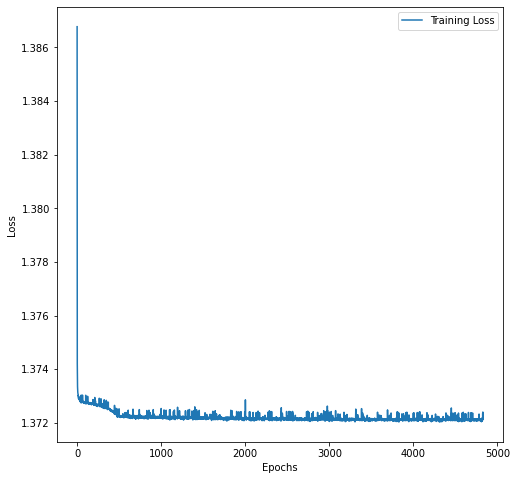

In [15]:
plot_loss(history)

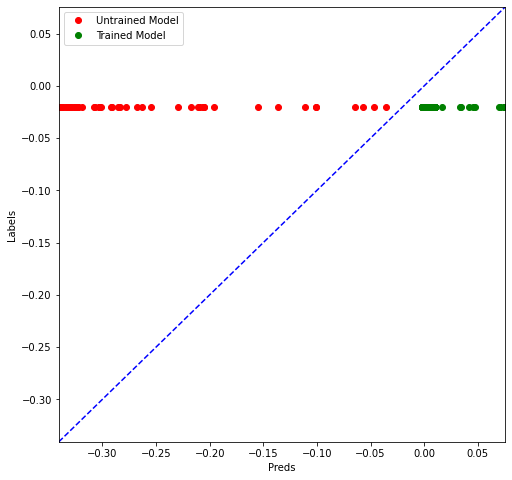

In [16]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [17]:
model=keras.models.load_model("Best_model.h5")
import time
s=time.time()
model.evaluate(X_test,y_test)
e=time.time()
t=e-s
print("Running time",t)

5/5 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0322
Running time 0.18829584121704102


In [0]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]
